#### model comparison

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/testset_unique_annotation.csv')

# Map patho to binary labels
patho_mapping = {"Benign": 0, "Likely benign": 0, "Pathogenic": 1, "Likely pathogenic": 1}
df["patho_binary"] = df["patho"].map(patho_mapping)

# Function to calculate accuracy and plot confusion matrix + ROC curve
def evaluate_predictions(df, predictors, true_label_col, figsize=(3, 3)):
    for predictor in predictors:
        # Accuracy calculation
        accuracy = accuracy_score(df[true_label_col], df[predictor])
        print(f"Accuracy for {predictor}: {accuracy:.2f}")
        
        # Confusion matrix
        cm = confusion_matrix(df[true_label_col], df[predictor])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        fig, ax = plt.subplots(figsize=figsize)
        disp.plot(ax=ax, cmap="Greens", values_format="d")
        ax.set_title(f"Confusion Matrix \nfor {predictor}")

        plt.tight_layout()
        plt.savefig('images/model_comparison/cm-' + predictor + '.png',dpi=300)
        plt.show()

# Define predictors and true label column
predictors = ["AlphaMissense", "ESM-1v"]
true_label_col = "patho_binary"

Accuracy for AlphaMissense: 0.91


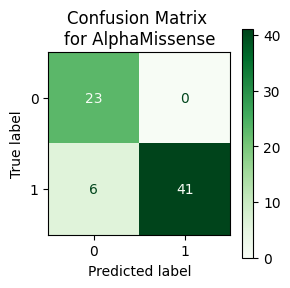

Accuracy for ESM-1v: 0.83


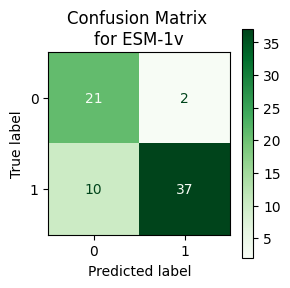

In [3]:
# Evaluate predictions with adjustable figure size
evaluate_predictions(df, predictors, true_label_col, figsize=(3, 3))

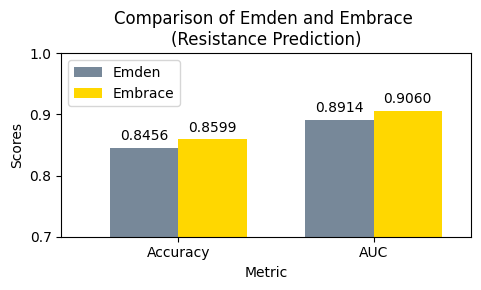

In [4]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'AUC']
emden_values = [0.8456, 0.8914]
embrace_values = [0.8599, 0.9060]

fig, ax = plt.subplots(figsize=(5, 3))  

x = np.arange(len(metrics))  
width = 0.35  

rects1 = ax.bar(x - width/2, emden_values, width, label='Emden', color='#778899')

rects2 = ax.bar(x + width/2, embrace_values, width, label='Embrace', color='#FFD700')

ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Emden and Embrace \n(Resistance Prediction)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

ax.legend(loc='upper left')

ax.set_ylim(0.7, 1)
ax.set_xlim(-0.6, 1.5) 

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)  
add_labels(rects2)  

plt.tight_layout()

plt.savefig('images/model_comparison/resistance-comparison.png', dpi=300)
plt.show()
